## Time Series in the CF Conventions

Data is located at named locations, called *stations*. There can be many stations, and ususally for each station we have multiple data with different time coordinates. Stations have a unique identifier. *Examples: weather station data, fixed buoys*.
* Global attribute `feature_type = timeSeries`.
* The altitude coordinate is optional.
* Special station variables are recognized by standard names as given below. For backwards compatibility, the given aliases are allowed.

    |**standard_name**|**alias**|
    |-----------------|---------|
    |`timeseries_id`|`station_id`|
    |`platform_name`|`station_description`|
    |`surface_altitude`|`station_altitude`|
    |`platform_id`|`station_WMO_id`|

There are different ways of structuring time series data:

* [Single Timeseries](https://cfconventions.org/Data/cf-conventions/cf-conventions-1.11/cf-conventions.html#_single_time_series_including_deviations_from_a_nominal_fixed_spatial_location): Only one station in the file

* [Orthogonal multidimensional array representation of time series](https://cfconventions.org/Data/cf-conventions/cf-conventions-1.11/cf-conventions.html#_orthogonal_multidimensional_array_representation_of_time_series): Multiple stations share the same number of time coordinates and the time values are identical, e.g. multiple weather stations measure at the same time, or the times are averaged to be the same. This representation can be used even in cases where individual time series have different time coordinate values. However, if too many missing values are raised, we can consider using the next representation.

* [Incomplete multidimensional array representation of time series](https://cfconventions.org/Data/cf-conventions/cf-conventions-1.11/cf-conventions.html#_incomplete_multidimensional_array_representation_of_time_series): Multiple stations, each station has different time coordinates. This representation is slightly more complicated than the previous one, but is more efficient in using storage space.

* [Contiguous ragged array representation of time series](https://cfconventions.org/Data/cf-conventions/cf-conventions-1.11/cf-conventions.html#_contiguous_ragged_array_representation_of_time_series): Multiple stations, and the dataset is complete (no more new observations will be made), using this representation is storage space efficient.

* [Indexed ragged array representation of time series](https://cfconventions.org/Data/cf-conventions/cf-conventions-1.11/cf-conventions.html#_indexed_ragged_array_representation_of_time_series): Fixed multiple stations, measurements still continue, and the dataset will get updated after new measurements are generated. We can't foresee from which station a new measurement is generated.


Show a single time series example!
(optionally converting it to CF-recommended format too!)

Merging everything is not always the best solution; when things get too complicated, it's more recommended to store time series separately, just as the source data provider did. And merging everything together may increase the file size unneccessarily because there might be many missing values. 

But in case you're in the situation where you need to or have to merge data, we show you an example here of how to do it.

(Example of merged time series!)

In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data')
os.getcwd()

'/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data'

Example Dataset: [Kelp Forest Monitoring Sea Temperature](https://coastwatch.pfeg.noaa.gov/erddap/tabledap/erdCinpKfmT.html)

In [3]:
ts_files = sorted(glob(os.path.join(os.getcwd(), "dsg_timeSeries", "*.nc")))
ts_files

['/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/dsg_timeSeries/KFMTemperature_Anacapa_Black_Sea_Bass_Reef.nc',
 '/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/dsg_timeSeries/KFMTemperature_Anacapa_Cathedral_Cove.nc',
 '/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/dsg_timeSeries/KFMTemperature_Anacapa_East_Fish_Camp.nc',
 '/Users/icdc/Documents/NFDI/Kemeng/cfbook/src/data/dsg_timeSeries/KFMTemperature_San_Clemente_Eel_Point.nc']

### H.2.3: Make Singel Time Series complied with the CF Conventions

In [29]:
ds_anacapa = xr.open_dataset(ts_files[0], decode_times=False)

print(ds_anacapa["ID"].data)
ds_anacapa

b'Anacapa (Black Sea Bass Reef)'


<xarray.Dataset> Size: 193kB
Dimensions:      (LON: 1, LAT: 1, DEPTH: 1, TIME: 16065)
Coordinates:
  * LON          (LON) float32 4B -119.4
  * LAT          (LAT) float32 4B 34.0
  * DEPTH        (DEPTH) int32 4B 17
  * TIME         (TIME) float64 129kB 1.13e+09 1.13e+09 ... 1.188e+09 1.188e+09
Data variables:
    Temperature  (TIME, DEPTH, LAT, LON) float32 64kB ...
    ID           |S29 29B b'Anacapa (Black Sea Bass Reef)'
Attributes: (12/38)
    acknowledgement:               NOAA NESDIS COASTWATCH, NOAA SWFSC ERD
    cdm_data_type:                 Station
    contributor_name:              Channel Islands National Park, National Pa...
    contributor_role:              Source of data.
    Conventions:                   COARDS, CF-1.0, Unidata Observation Datase...
    creator_email:                 Roy.Mendelssohn@noaa.gov
    ...                            ...
    standard_name_vocabulary:      CF-1.0
    summary:                       The subtidal temperature data taken at Cha...
    time_coverage_end:             2007-08-21T00:42:00Z
    time_coverage_start:           2005-10-20T17:32:00Z
    title:                         Sea Temperature (Kelp Forest Monitoring, C...
    Westernmost_Easting:           -119.38333

In [30]:
# Original shape of the "Temperature" data
print(ds_anacapa.Temperature.shape)

# Length of the original "Temperature" data array
print(len(ds_anacapa.Temperature))

# Reshape it as a one-dimensional array, using numpy.ndarray.reshape
temp = ds_anacapa.Temperature.data.reshape([len(ds_anacapa.Temperature)])
temp

(16065, 1, 1, 1)
16065


array([16.66, 16.5 , 16.5 , ..., 18.21, 18.21, 18.21], dtype=float32)

In [31]:
# Get the data values of latitude, longitude and depth
lat = ds_anacapa.LAT.data[0]
lon = ds_anacapa.LON.data[0]
depth = ds_anacapa.DEPTH.data[0]

print(lat, lon, depth)

34.0 -119.38333 17


In [32]:
# Get Variable Attributes
attr_lat = ds_anacapa.LAT.attrs
attr_lon = ds_anacapa.LON.attrs
attr_depth = ds_anacapa.DEPTH.attrs
attr_temp = ds_anacapa.Temperature.attrs

attr_lat

{'_CoordinateAxisType': 'Lat',
 'actual_range': array([34., 34.], dtype=float32),
 'axis': 'Y',
 'long_name': 'Latitude',
 'standard_name': 'latitude',
 'units': 'degrees_north'}

In [34]:
# Drop unneeded dimensions, rename dimension and coordinate variable of time
ds_anacapa = ds_anacapa.drop_dims(["LON", "LAT", "DEPTH"]).rename({"TIME":"time", "ID":"station_name"})
ds_anacapa

<xarray.Dataset> Size: 129kB
Dimensions:       (time: 16065)
Coordinates:
  * time          (time) float64 129kB 1.13e+09 1.13e+09 ... 1.188e+09 1.188e+09
Data variables:
    station_name  |S29 29B b'Anacapa (Black Sea Bass Reef)'
Attributes: (12/38)
    acknowledgement:               NOAA NESDIS COASTWATCH, NOAA SWFSC ERD
    cdm_data_type:                 Station
    contributor_name:              Channel Islands National Park, National Pa...
    contributor_role:              Source of data.
    Conventions:                   COARDS, CF-1.0, Unidata Observation Datase...
    creator_email:                 Roy.Mendelssohn@noaa.gov
    ...                            ...
    standard_name_vocabulary:      CF-1.0
    summary:                       The subtidal temperature data taken at Cha...
    time_coverage_end:             2007-08-21T00:42:00Z
    time_coverage_start:           2005-10-20T17:32:00Z
    title:                         Sea Temperature (Kelp Forest Monitoring, C...
    Westernmost_Easting:           -119.38333

```{note}
`xarray.Dataset.rename()` will change the name of both the dimension and the coordinate variable, while `xarray.Dataset.rename_dims()` only changes the name of the dimension and leaves the coordinate variable name unchanged.
```

In [35]:
# Recompose the Dataset
ds_anacapa = ds_anacapa.assign_coords(lat = ([], np.float32(lat), attr_lat),
                                     lon = ([], np.float32(lon), attr_lon),
                                     depth = ([], np.int32(depth), attr_depth))

ds_anacapa = ds_anacapa.assign(temperature = (['time'], np.float32(temp), attr_temp))

ds_anacapa

<xarray.Dataset> Size: 193kB
Dimensions:       (time: 16065)
Coordinates:
  * time          (time) float64 129kB 1.13e+09 1.13e+09 ... 1.188e+09 1.188e+09
    lat           float32 4B 34.0
    lon           float32 4B -119.4
    depth         int32 4B 17
Data variables:
    station_name  |S29 29B b'Anacapa (Black Sea Bass Reef)'
    temperature   (time) float32 64kB 16.66 16.5 16.5 ... 18.21 18.21 18.21
Attributes: (12/38)
    acknowledgement:               NOAA NESDIS COASTWATCH, NOAA SWFSC ERD
    cdm_data_type:                 Station
    contributor_name:              Channel Islands National Park, National Pa...
    contributor_role:              Source of data.
    Conventions:                   COARDS, CF-1.0, Unidata Observation Datase...
    creator_email:                 Roy.Mendelssohn@noaa.gov
    ...                            ...
    standard_name_vocabulary:      CF-1.0
    summary:                       The subtidal temperature data taken at Cha...
    time_coverage_end:             2007-08-21T00:42:00Z
    time_coverage_start:           2005-10-20T17:32:00Z
    title:                         Sea Temperature (Kelp Forest Monitoring, C...
    Westernmost_Easting:           -119.38333

```{note}
`xarray.Dataset.assign_coords` will add new coordinate variables to the dataset, and `xarray.Dataset.assign` will add new data variables to the dataset. In this example, latitude, longitude, and depth function like auxiliary coordinate variable, so they're added as coordinates.
```

In [36]:
ds_anacapa.info()

xarray.Dataset {
dimensions:
	time = 16065 ;

variables:
	float64 time(time) ;
		time:_CoordinateAxisType = Time ;
		time:actual_range = [1.12982952e+09 1.18765692e+09] ;
		time:axis = T ;
		time:long_name = Time ;
		time:standard_name = time ;
		time:time_origin = 01-JAN-1970 00:00:00 ;
		time:units = seconds since 1970-01-01T00:00:00Z ;
	|S29 station_name() ;
		station_name:long_name = Station Identifier ;
		station_name:units = unitless ;
	float32 lat() ;
		lat:_CoordinateAxisType = Lat ;
		lat:actual_range = [34. 34.] ;
		lat:axis = Y ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float32 lon() ;
		lon:_CoordinateAxisType = Lon ;
		lon:actual_range = [-119.38333 -119.38333] ;
		lon:axis = X ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	int32 depth() ;
		depth:_CoordinateAxisType = Height ;
		depth:_CoordinateZisPositive = down ;
		depth:actual_range = [17 17] ;
		depth:axis = Z ;
		dep

In [37]:
# Add auxiliary coordinate variables as in "coordinates" attribute
ds_anacapa['temperature'].attrs['coordinates'] = "lat lon depth station_name"

# Add cf_role to station name
ds_anacapa.station_name.attrs['cf_role'] = "timeseries_id"

# Add feature type in to global attribute
ds_anacapa.attrs['feature_type'] = "timeSeries"

ds_anacapa.info()

xarray.Dataset {
dimensions:
	time = 16065 ;

variables:
	float64 time(time) ;
		time:_CoordinateAxisType = Time ;
		time:actual_range = [1.12982952e+09 1.18765692e+09] ;
		time:axis = T ;
		time:long_name = Time ;
		time:standard_name = time ;
		time:time_origin = 01-JAN-1970 00:00:00 ;
		time:units = seconds since 1970-01-01T00:00:00Z ;
	|S29 station_name() ;
		station_name:long_name = Station Identifier ;
		station_name:units = unitless ;
	float32 lat() ;
		lat:_CoordinateAxisType = Lat ;
		lat:actual_range = [34. 34.] ;
		lat:axis = Y ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float32 lon() ;
		lon:_CoordinateAxisType = Lon ;
		lon:actual_range = [-119.38333 -119.38333] ;
		lon:axis = X ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	int32 depth() ;
		depth:_CoordinateAxisType = Height ;
		depth:_CoordinateZisPositive = down ;
		depth:actual_range = [17 17] ;
		depth:axis = Z ;
		dep

### H.2.4: Combine multiple time series with different time values into single file (Data Complete)

In [35]:
ds_anacapa1 = xr.open_dataset(ts_files[0], decode_times=False)
ds_anacapa2 = xr.open_dataset(ts_files[-1], decode_times=False)
print(ds_anacapa1.ID.data, ds_anacapa2.ID.data)

b'Anacapa (Black Sea Bass Reef)' b'San Clemente (Eel Point)'


In [36]:
# Longitudes of two stations
lon = [ds_anacapa1.LON.data[0], ds_anacapa2.LON.data[0]]
print("Longitudes of two stations: ", lon)

# Latitudes of two stations
lat = [ds_anacapa1.LAT.data[0], ds_anacapa2.LAT.data[0]]
print("Latitudes of two stations: ", lat)

# Depth of two stations
depth = [ds_anacapa1.DEPTH.data[0], ds_anacapa2.DEPTH.data[0]]
print("Depth of two stations: ", depth)

# Names of two stations
station_name = [ds_anacapa1.ID.data.astype("str").item(),
                ds_anacapa2.ID.data.astype("str").item()]
print("Names of two stations: ", station_name)

# Number of observations for each station
row_size = [len(ds_anacapa1.TIME), len(ds_anacapa2.TIME)]
print("Number of observations for each station: ", row_size)

Longitudes of two stations:  [-119.38333, -118.53333]
Latitudes of two stations:  [34.0, 32.95]
Depth of two stations:  [17, 10]
Names of two stations:  ['Anacapa (Black Sea Bass Reef)', 'San Clemente (Eel Point)']
Number of observations for each station:  [16065, 9385]


In [37]:
# Time coordinates of all observations at two stations
time = np.concatenate([ds_anacapa1.TIME.data, ds_anacapa2.TIME.data])
print("Array shape of the time coordinates:", time.shape)

Array shape of the time coordinates: (25450,)


In [38]:
# Temperature of all observations at two stations
temp = np.concatenate([ds_anacapa1.Temperature.data.reshape(len(ds_anacapa1.TIME)),
                       ds_anacapa2.Temperature.data.reshape(len(ds_anacapa2.TIME))])
print("Array shape of the temperature variable for two stations:", temp.shape)

Array shape of the temperature variable for two stations: (25450,)


In [39]:
# Extract Variable Attributes
attr_lat = ds_anacapa1.LAT.attrs
attr_lon = ds_anacapa1.LON.attrs
attr_depth = ds_anacapa1.DEPTH.attrs
attr_time = ds_anacapa1.TIME.attrs
attr_temp = ds_anacapa1.Temperature.attrs

In [40]:
# Compose the new Dataset
ds_anacapa = xr.Dataset(
    coords = {
        'lon': (['station'], np.float32(lon), attr_lon),
        'lat': (['station'], np.float32(lat), attr_lat),
        'depth': (['station'], np.float32(depth), attr_depth),
        'time': (['obs'], np.float64(time), attr_time),
        'station_name': (['station'], station_name)
    },
    data_vars = {'temperature': (['obs'], np.float32(temp), attr_temp),
                 'row_size': (['station'], np.int32(row_size))}   
)

ds_anacapa

<xarray.Dataset> Size: 306kB
Dimensions:       (obs: 25450, station: 2)
Coordinates:
    lon           (station) float32 8B -119.4 -118.5
    lat           (station) float32 8B 34.0 32.95
    depth         (station) float32 8B 17.0 10.0
    time          (obs) float64 204kB 1.13e+09 1.13e+09 ... 1.088e+09 1.088e+09
    station_name  (station) <U29 232B 'Anacapa (Black Sea Bass Reef)' 'San Cl...
Dimensions without coordinates: obs, station
Data variables:
    temperature   (obs) float32 102kB 16.66 16.5 16.5 ... 16.24 16.56 16.72
    row_size      (station) int32 8B 16065 9385

In [41]:
# Add some more variable attributes
ds_anacapa.station_name.attrs = {"long_name": "station name",
                                 "cf_role": "timeseries_id"}

ds_anacapa.row_size.attrs = {"long_name": "number of observations for this station",
                             "sample_dimension": "obs"}

In [42]:
# Add Global Attributes
ds_anacapa.attrs = {"featureType": "timeSeries"}

In [43]:
ds_anacapa.info()

xarray.Dataset {
dimensions:
	obs = 25450 ;
	station = 2 ;

variables:
	float32 temperature(obs) ;
		temperature:actual_range = [10.91 22.34] ;
		temperature:long_name = Sea Temperature ;
		temperature:standard_name = sea_water_temperature ;
		temperature:units = degree_C ;
	int32 row_size(station) ;
		row_size:long_name = number of observations for this station ;
		row_size:sample_dimension = obs ;
	float32 lon(station) ;
		lon:_CoordinateAxisType = Lon ;
		lon:actual_range = [-119.38333 -119.38333] ;
		lon:axis = X ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	float32 lat(station) ;
		lat:_CoordinateAxisType = Lat ;
		lat:actual_range = [34. 34.] ;
		lat:axis = Y ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float32 depth(station) ;
		depth:_CoordinateAxisType = Height ;
		depth:_CoordinateZisPositive = down ;
		depth:actual_range = [17 17] ;
		depth:axis = Z ;
		depth:long_name = Depth

In [44]:
# Update Variable Attribute: actual_range...
range_lon = [ds_anacapa.lon.data.min(), ds_anacapa.lon.data.max()]
range_lat = [ds_anacapa.lat.data.min(), ds_anacapa.lat.data.max()]
range_depth = [ds_anacapa.depth.data.min(), ds_anacapa.depth.data.max()]
range_time = [ds_anacapa.time.data.min(), ds_anacapa.time.data.max()]
range_temp = [ds_anacapa.temperature.data.min(), ds_anacapa.temperature.data.max()]

ds_anacapa.lon.attrs['actual_range'] = range_lon
ds_anacapa.lat.attrs['actual_range'] = range_lat
ds_anacapa.depth.attrs['actual_range'] = range_depth
ds_anacapa.time.attrs['actual_range'] = range_time
ds_anacapa.temperature.attrs['actual_range'] = range_temp

ds_anacapa.info()

xarray.Dataset {
dimensions:
	obs = 25450 ;
	station = 2 ;

variables:
	float32 temperature(obs) ;
		temperature:actual_range = [10.91, 22.34] ;
		temperature:long_name = Sea Temperature ;
		temperature:standard_name = sea_water_temperature ;
		temperature:units = degree_C ;
	int32 row_size(station) ;
		row_size:long_name = number of observations for this station ;
		row_size:sample_dimension = obs ;
	float32 lon(station) ;
		lon:_CoordinateAxisType = Lon ;
		lon:actual_range = [-119.38333, -118.53333] ;
		lon:axis = X ;
		lon:long_name = Longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	float32 lat(station) ;
		lat:_CoordinateAxisType = Lat ;
		lat:actual_range = [32.95, 34.0] ;
		lat:axis = Y ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float32 depth(station) ;
		depth:_CoordinateAxisType = Height ;
		depth:_CoordinateZisPositive = down ;
		depth:actual_range = [10.0, 17.0] ;
		depth:axis = Z ;
		depth:long_n

### H.2.5 Indexed ragged array representation of time series

When time series with different lengths are written incrementally.

In [45]:
ds_anacapa1 = xr.open_dataset(ts_files[0], decode_times=False)
ds_anacapa2 = xr.open_dataset(ts_files[-1], decode_times=False)
print(ds_anacapa1.ID.data, ds_anacapa2.ID.data)

b'Anacapa (Black Sea Bass Reef)' b'San Clemente (Eel Point)'


In [54]:
# Longitudes of two stations
lon = [ds_anacapa1.LON.data[0], ds_anacapa2.LON.data[0]]
print("Longitudes of two stations: ", lon)

# Latitudes of two stations
lat = [ds_anacapa1.LAT.data[0], ds_anacapa2.LAT.data[0]]
print("Latitudes of two stations: ", lat)

# Depth of two stations
depth = [ds_anacapa1.DEPTH.data[0], ds_anacapa2.DEPTH.data[0]]
print("Depth of two stations: ", depth)

# Names of two stations
station_name = [ds_anacapa1.ID.data.astype("str").item(),
                ds_anacapa2.ID.data.astype("str").item()]
print("Names of two stations: ", station_name)

# Create an index for each station
index = list(range(len(station_name)))
print("Index of stations: ", index)

Longitudes of two stations:  [-119.38333, -118.53333]
Latitudes of two stations:  [34.0, 32.95]
Depth of two stations:  [17, 10]
Names of two stations:  ['Anacapa (Black Sea Bass Reef)', 'San Clemente (Eel Point)']
Index of stations:  [0, 1]


In [47]:
# Time coordinates of all observations at two stations
time = np.concatenate([ds_anacapa1.TIME.data, ds_anacapa2.TIME.data])
print("Array shape of the time coordinates:", time.shape)

Array shape of the time coordinates: (25450,)


In [48]:
# Temperature of all observations at two stations
temp = np.concatenate([ds_anacapa1.Temperature.data.reshape(len(ds_anacapa1.TIME)),
                       ds_anacapa2.Temperature.data.reshape(len(ds_anacapa2.TIME))])
print("Array shape of the temperature variable for two stations:", temp.shape)

Array shape of the temperature variable for two stations: (25450,)


In [62]:
# Assign an index to each station
stationIndex = np.concatenate([np.tile(index[0], len(ds_anacapa1.TIME)),
                               np.tile(index[1], len(ds_anacapa2.TIME))])
print("Station Index of all existing observations: ", stationIndex)
print("Array shape of the staion index: ", stationIndex.shape)

Station Index of all existing observations:  [0 0 0 ... 1 1 1]
Array shape of the staion index:  (25450,)


In [49]:
# Extract Variable Attributes
attr_lat = ds_anacapa1.LAT.attrs
attr_lon = ds_anacapa1.LON.attrs
attr_depth = ds_anacapa1.DEPTH.attrs
attr_time = ds_anacapa1.TIME.attrs
attr_temp = ds_anacapa1.Temperature.attrs

In [64]:
# Compose the new Dataset
ds_anacapa = xr.Dataset(
    coords = {
        'lon': (['station'], np.float32(lon), attr_lon),
        'lat': (['station'], np.float32(lat), attr_lat),
        'depth': (['station'], np.float32(depth), attr_depth),
        'time': (['obs'], np.float64(time), attr_time),
        'station_name': (['station'], station_name, {"long_name": "station name",
                                                     "cf_role":"timeseries_id"}),
        
        # Assign each station with an index
        'station_info': (['station'], np.byte(index), {"long_name":"0-Anacapa, 1-SanClemente"}),
        'stationIndex': (['obs'], np.byte(stationIndex), {"long_name":"which station this obs is for",
                                                          "instance_dimension": "station"})
    },
    data_vars = {'temperature': (['obs'], np.float32(temp), attr_temp)}   
)

ds_anacapa

<xarray.Dataset> Size: 331kB
Dimensions:       (obs: 25450, station: 2)
Coordinates:
    lon           (station) float32 8B -119.4 -118.5
    lat           (station) float32 8B 34.0 32.95
    depth         (station) float32 8B 17.0 10.0
    time          (obs) float64 204kB 1.13e+09 1.13e+09 ... 1.088e+09 1.088e+09
    station_name  (station) <U29 232B 'Anacapa (Black Sea Bass Reef)' 'San Cl...
    station_info  (station) int8 2B 0 1
    stationIndex  (obs) int8 25kB 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1 1
Dimensions without coordinates: obs, station
Data variables:
    temperature   (obs) float32 102kB 16.66 16.5 16.5 ... 16.24 16.56 16.72

### H.2.2 Incomplete multidimensional array representation of time series

Multiple stations, time series have different time coordinate values

The two datasets have overlapped time period, but different time values.

b'Anacapa (Black Sea Bass Reef)' b'Anacapa (East Fish Camp)'
['2005-10-20T17:32:00.000000000' '2005-10-20T18:32:00.000000000'
 '2005-10-20T19:32:00.000000000' '2005-10-20T20:32:00.000000000'
 '2005-10-20T21:32:00.000000000' '2005-10-20T22:32:00.000000000'
 '2005-10-20T23:32:00.000000000' '2005-10-21T00:32:00.000000000'
 '2005-10-21T01:32:00.000000000' '2005-10-21T02:32:00.000000000']
['2005-09-09T18:30:00.000000000' '2005-09-09T19:30:00.000000000'
 '2005-09-09T20:30:00.000000000' '2005-09-09T21:30:00.000000000'
 '2005-09-09T22:30:00.000000000' '2005-09-09T23:30:00.000000000'
 '2005-09-10T00:30:00.000000000' '2005-09-10T01:30:00.000000000'
 '2005-09-10T02:30:00.000000000' '2005-09-10T03:30:00.000000000']


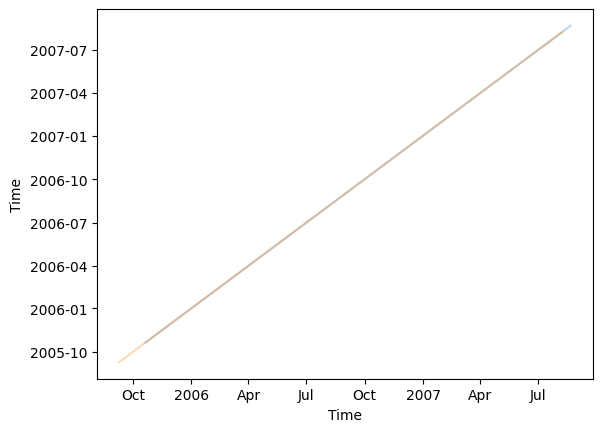

In [34]:
# Observing the Dataset
ds_anacapa1 = xr.open_dataset(ts_files[0], decode_times=True)
ds_anacapa2 = xr.open_dataset(ts_files[2], decode_times=True)
print(ds_anacapa1.ID.data, ds_anacapa2.ID.data)

print(ds_anacapa1.TIME.data[:10])
print(ds_anacapa2.TIME.data[:10])

print(ds_anacapa1.TIME.plot(alpha=0.3))
print(ds_anacapa2.TIME.plot(alpha=0.3))

In [30]:
ds_anacapa1 = xr.open_dataset(ts_files[0], decode_times=False)
ds_anacapa2 = xr.open_dataset(ts_files[2], decode_times=False)
print(ds_anacapa1.ID.data, ds_anacapa2.ID.data)

b'Anacapa (Black Sea Bass Reef)' b'Anacapa (East Fish Camp)'


In [31]:
# Longitudes of two stations
lon = [ds_anacapa1.LON.data[0], ds_anacapa2.LON.data[0]]
print("Longitudes of two stations: ", lon)

# Latitudes of two stations
lat = [ds_anacapa1.LAT.data[0], ds_anacapa2.LAT.data[0]]
print("Latitudes of two stations: ", lat)

# Depth of two stations
depth = [ds_anacapa1.DEPTH.data[0], ds_anacapa2.DEPTH.data[0]]
print("Depth of two stations: ", depth)

# Names of two stations
station_name = [ds_anacapa1.ID.data.astype("str").item(),
                ds_anacapa2.ID.data.astype("str").item()]
print("Names of two stations: ", station_name)

# Number of observations for each station
row_size = [len(ds_anacapa1.TIME), len(ds_anacapa2.TIME)]
print("Number of observations for each station: ", row_size)

Longitudes of two stations:  [-119.38333, -119.38333]
Latitudes of two stations:  [34.0, 34.0]
Depth of two stations:  [17, 11]
Names of two stations:  ['Anacapa (Black Sea Bass Reef)', 'Anacapa (East Fish Camp)']
Number of observations for each station:  [16065, 16733]


In [ ]:
# "time" is a two-dimensional array.
time = np.concatenate([ds_anacapa1.TIME.data, ds_anacapa2.TIME.data])
print("Array shape of the time coordinates:", time.shape)

Array shape of the time coordinates: (25450,)
